In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
df = pd.read_csv("E:/Starburst/fotometri/bestwise.csv")  # üzerinde çalıştığın dosya son olarak bestwise.csv    

In [3]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,...,e_pmRA,pmDE,e_pmDE,d2M,angDist,starburst,w1_w2,w2_w3,u-g,g_r
0,1.237646e+18,58.755087,0.166029,22.31945,19.96884,19.07325,18.56721,18.40355,109,301,...,670.0,111.0,711.0,NaN,0.615874,True,0.295001,4.028999,1.99078,0.50425
1,1.237646e+18,58.119408,0.867978,20.99909,19.81379,19.24014,18.82215,18.80851,109,301,...,740.0,-23.0,770.0,NaN,0.300684,True,-0.680000,4.160001,0.96626,0.33542
2,1.237646e+18,58.312116,0.913616,20.47755,19.23238,18.62570,18.20181,18.01174,109,301,...,447.0,-590.0,474.0,NaN,1.820958,True,0.213000,3.774000,1.00245,0.34269
3,1.237649e+18,197.102729,0.346564,19.37188,18.30153,17.70413,17.33631,17.10646,745,301,...,142.0,10.0,155.0,NaN,0.142423,True,0.368000,3.983000,1.05300,0.57851
4,1.237649e+18,197.351690,0.236358,19.28066,18.50669,17.95210,17.57351,17.44339,745,301,...,192.0,79.0,203.0,NaN,0.252467,False,0.663000,3.391001,0.75133,0.52996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65701,1.237679e+18,42.991935,1.182476,21.57734,20.73942,20.01764,19.70566,19.67707,7717,301,...,981.0,-1550.0,1025.0,NaN,0.024220,True,0.176001,4.438000,0.78268,0.66170
65702,1.237679e+18,43.278367,1.161948,18.95892,17.73884,17.29038,16.98685,16.88441,7717,301,...,86.0,-82.0,89.0,1.555,1.689058,True,0.238000,3.909000,1.14979,0.37200
65703,1.237679e+18,43.157917,1.223304,21.18378,20.23284,19.45075,19.12349,18.76085,7717,301,...,389.0,41.0,406.0,NaN,0.234115,True,0.519999,4.271000,0.88541,0.71083
65704,1.237679e+18,44.246115,1.231859,18.99367,18.01557,17.80924,17.64309,17.48446,7717,301,...,240.0,-136.0,250.0,NaN,1.530998,True,0.179000,3.177999,0.90019,0.12160


In [4]:
# Eksik verileri (NaN değerlerini) elemek için maske oluşturuyoruz
mask = df[['u', 'g', 'r', 'i', 'W1mag', 'W2mag', 'W3mag', 'W4mag']].notna().all(axis=1)

# Maskeyi kullanarak NaN olmayan satırları seçiyoruz
filtered_df = df[mask]

In [5]:
sdss_mask = (df.psfMagErr_u/df.u<0.05) & (df.psfMagErr_g/df.g<0.05) &(df.psfMagErr_r/df.r<0.05) &(df.psfMagErr_i/df.i<0.05) #&psfmagerr_g/g<0.05 &psfmagerr_r/r<0.05 &psfmagerr_i/i<0.05

In [6]:
df[sdss_mask]

,objid,ra,dec,u,g,r,i,z,run,rerun,...,e_pmRA,pmDE,e_pmDE,d2M,angDist,starburst,w1_w2,w2_w3,u-g,g_r
0,1.237646e+18,58.755087,0.166029,22.31945,19.96884,19.07325,18.56721,18.40355,109,301,...,670.0,111.0,711.0,NaN,0.615874,True,0.295001,4.028999,1.99078,0.50425
1,1.237646e+18,58.119408,0.867978,20.99909,19.81379,19.24014,18.82215,18.80851,109,301,...,740.0,-23.0,770.0,NaN,0.300684,True,-0.680000,4.160001,0.96626,0.33542
2,1.237646e+18,58.312116,0.913616,20.47755,19.23238,18.62570,18.20181,18.01174,109,301,...,447.0,-590.0,474.0,NaN,1.820958,True,0.213000,3.774000,1.00245,0.34269
3,1.237649e+18,197.102729,0.346564,19.37188,18.30153,17.70413,17.33631,17.10646,745,301,...,142.0,10.0,155.0,NaN,0.142423,True,0.368000,3.983000,1.05300,0.57851
4,1.237649e+18,197.351690,0.236358,19.28066,18.50669,17.95210,17.57351,17.44339,745,301,...,192.0,79.0,203.0,NaN,0.252467,False,0.663000,3.391001,0.75133,0.52996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65701,1.237679e+18,42.991935,1.182476,21.57734,20.73942,20.01764,19.70566,19.67707,7717,301,...,981.0,-1550.0,1025.0,NaN,0.024220,True,0.176001,4.438000,0.78268,0.66170
65702,1.237679e+18,43.278367,1.161948,18.95892,17.73884,17.29038,16.98685,16.88441,7717,301,...,86.0,-82.0,89.0,1.555,1.689058,True,0.238000,3.909000,1.14979,0.37200
65703,1.237679e+18,43.157917,1.223304,21.18378,20.23284,19.45075,19.12349,18.76085,7717,301,...,389.0,41.0,406.0,NaN,0.234115,True,0.519999,4.271000,0.88541,0.71083
65704,1.237679e+18,44.246115,1.231859,18.99367,18.01557,17.80924,17.64309,17.48446,7717,301,...,240.0,-136.0,250.0,NaN,1.530998,True,0.179000,3.177999,0.90019,0.12160


In [9]:
wise_mask = (df.e_W1mag/df.W1mag <0.05) & (df.e_W2mag/df.W2mag <0.05) & (df.e_W3mag/df.W3mag <0.05)

In [10]:
df['temiz'] =0

In [11]:
aday_temiz =df[wise_mask][sdss_mask]

C:\Users\pilot\AppData\Local\Temp\ipykernel_2188\1182344352.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aday_temiz =df[wise_mask][sdss_mask]


In [12]:
aday_temiz

,objid,ra,dec,u,g,r,i,z,run,rerun,...,pmDE,e_pmDE,d2M,angDist,starburst,w1_w2,w2_w3,u-g,g_r,temiz
2,1.237646e+18,58.312116,0.913616,20.47755,19.23238,18.62570,18.20181,18.01174,109,301,...,-590.0,474.0,NaN,1.820958,True,0.213000,3.774000,1.00245,0.34269,0
3,1.237649e+18,197.102729,0.346564,19.37188,18.30153,17.70413,17.33631,17.10646,745,301,...,10.0,155.0,NaN,0.142423,True,0.368000,3.983000,1.05300,0.57851,0
4,1.237649e+18,197.351690,0.236358,19.28066,18.50669,17.95210,17.57351,17.44339,745,301,...,79.0,203.0,NaN,0.252467,False,0.663000,3.391001,0.75133,0.52996,0
5,1.237649e+18,198.088755,0.307900,18.16785,17.26439,17.02209,16.80380,16.67497,745,301,...,-266.0,196.0,NaN,0.235769,True,0.224000,3.433001,0.87462,0.21096,0
6,1.237649e+18,198.110835,0.410275,19.04386,17.90464,17.36408,16.94839,16.79804,745,301,...,123.0,189.0,0.459,0.110005,True,0.186000,3.976999,1.10859,0.50726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65700,1.237679e+18,39.724521,1.258377,20.21463,18.94907,18.32863,17.88396,17.67945,7717,301,...,372.0,69.0,0.545,0.319169,True,0.511000,4.507000,1.23253,0.58451,0
65702,1.237679e+18,43.278367,1.161948,18.95892,17.73884,17.29038,16.98685,16.88441,7717,301,...,-82.0,89.0,1.555,1.689058,True,0.238000,3.909000,1.14979,0.37200,0
65703,1.237679e+18,43.157917,1.223304,21.18378,20.23284,19.45075,19.12349,18.76085,7717,301,...,41.0,406.0,NaN,0.234115,True,0.519999,4.271000,0.88541,0.71083,0
65704,1.237679e+18,44.246115,1.231859,18.99367,18.01557,17.80924,17.64309,17.48446,7717,301,...,-136.0,250.0,NaN,1.530998,True,0.179000,3.177999,0.90019,0.12160,0


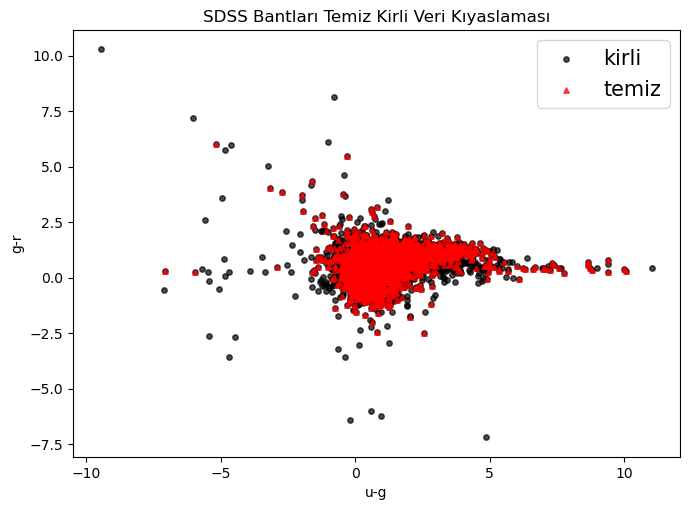

In [12]:
plt.figure(figsize = (7,5))
plt.scatter(df.dered_u-df.dered_g, df.dered_g - df.dered_r, s = 15, color='k', label = "kirli", alpha=0.7)
plt.scatter(aday_temiz.dered_u-aday_temiz.dered_g, aday_temiz.dered_g - aday_temiz.dered_r, marker = '^' ,s = 15, color='r', label= "temiz", alpha=0.7)
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.tight_layout()
plt.title("SDSS Bantları Temiz Kirli Veri Kıyaslaması")
plt.legend(fontsize=15, loc='upper right') 
#plt.savefig('', dpi = 1200)#.png, .pdf
plt.show()

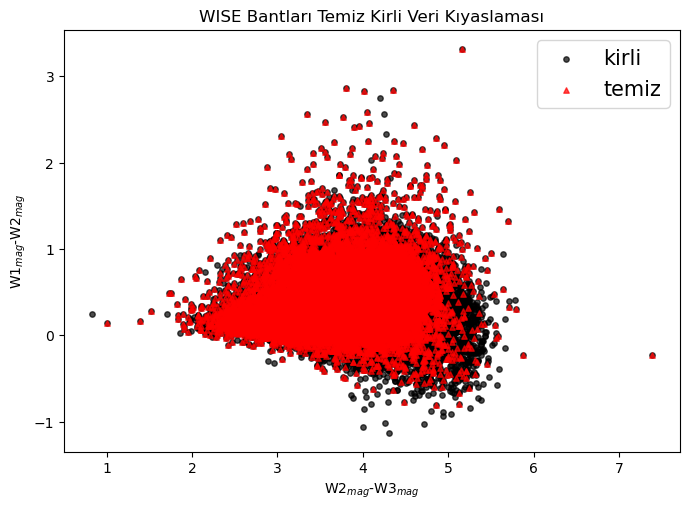

In [13]:
plt.figure(figsize = (7,5))
plt.scatter(df.W2mag-df.W3mag, df.W1mag-df.W2mag, s = 15, color='k', label = "kirli", alpha=0.7)
plt.scatter(aday_temiz.W2mag-aday_temiz.W3mag, aday_temiz.W1mag-aday_temiz.W2mag, marker = '^' ,s = 15, color='r', label = "temiz",alpha=0.7)
plt.xlabel(r'W2$_{mag}$-W3$_{mag}$')
plt.ylabel('W1$_{mag}$-W2$_{mag}$')
plt.tight_layout()
plt.title("WISE Bantları Temiz Kirli Veri Kıyaslaması")
plt.legend(fontsize=15, loc='upper right') 
#plt.savefig('', dpi = 1200)#.png, .pdf
plt.show()

In [13]:
# FOTOMETRİK OLARAK YÜG OLMA KRİTERLERİNİ UYGULADIK

foto_mask = (aday_temiz.W1mag-aday_temiz.W2mag < 0.6) & (aday_temiz.W2mag-aday_temiz.W3mag > 1.8) & (aday_temiz.g-aday_temiz.r < 1) & (aday_temiz['u']-aday_temiz['g'] < 1.9)

In [14]:
aday_temiz['u'][foto_mask].size 

46870

In [15]:
%matplotlib inline

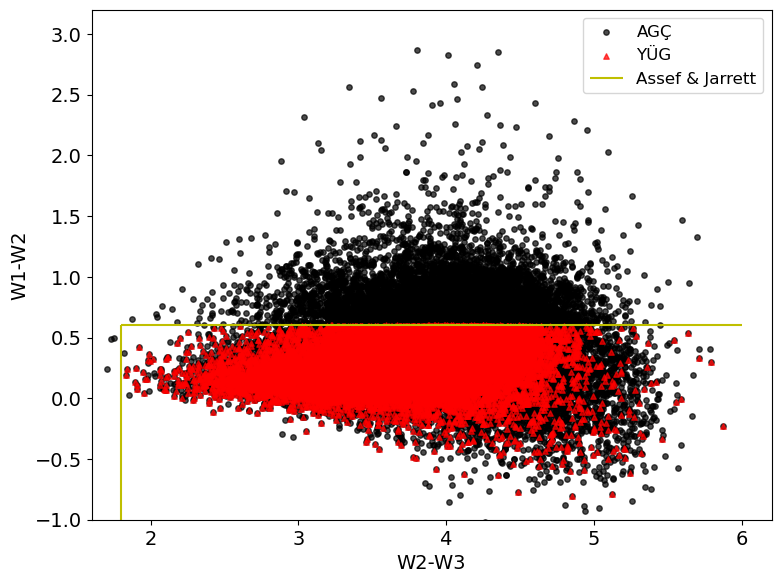

In [16]:
fig0=plt.figure(figsize = (8,6))
plt.scatter(df.W2mag-df.W3mag, df.W1mag-df.W2mag, s = 15, color='k', label = "AGÇ", alpha=0.7)
plt.scatter(aday_temiz.W2mag-aday_temiz.W3mag[foto_mask],  aday_temiz.W1mag-aday_temiz.W2mag[foto_mask], marker = '^' ,s = 15, color='r', label= "YÜG", alpha=0.7)
plt.vlines(1.8,ymin=-1,ymax=0.6, linestyles='-',colors='y',label='Assef & Jarrett')
plt.hlines(0.6,xmin=1.8,xmax=6,linestyles='-',colors='y')
plt.xlabel('W2-W3',fontsize=14)
plt.ylabel('W1-W2',fontsize=14)
plt.xticks(fontsize=14)  # X eksenindeki yazıların boyutu
plt.yticks(fontsize=14)  # Y eksenindeki yazıların boyutu
#plt.tight_layout()
plt.xlim(1.60, 6.2)
plt.ylim(-1, 3.2)
plt.legend(fontsize=12, loc='upper right')
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)
plt.gca().set_aspect('auto')
plt.savefig('C:/Desktop/WISE ile YÜG Seçimi.png', dpi=200, bbox_inches='tight') #.png, .pdf
plt.show(fig0)

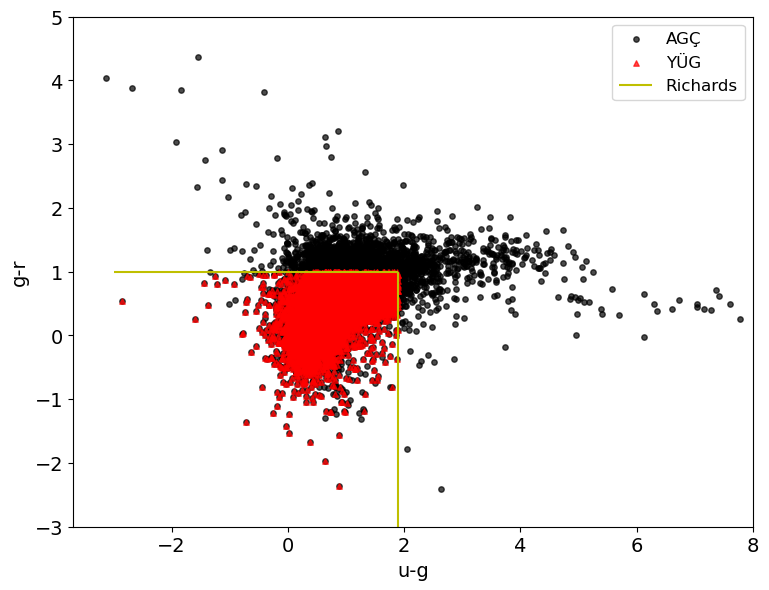

In [17]:
fig1 =plt.figure(figsize = (8,6))
plt.scatter(aday_temiz['u']-aday_temiz['g'], aday_temiz.g-aday_temiz.r, s = 15, color='k', label = "AGÇ", alpha=0.7)
plt.scatter(aday_temiz['u']-aday_temiz['g'][foto_mask], aday_temiz.g-aday_temiz.r[foto_mask], marker = '^' ,s = 15, color='r', label = "YÜG", alpha=0.7)
plt.vlines(1.9,ymin=-3,ymax=1, linestyles='-',colors='y',label='Richards')
plt.hlines(1,xmin=-3,xmax=1.9,linestyles='-',colors='y')
plt.xlabel('u-g',fontsize=14)
plt.ylabel('g-r',fontsize=14)
plt.xticks(fontsize=14)  # X eksenindeki yazıların boyutu
plt.yticks(fontsize=14)  # Y eksenindeki yazıların boyutu
#plt.tight_layout()
#plt.title("SDSS ile YÜG Seçimi")
plt.legend(fontsize= 12,loc='upper right')
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)
plt.gca().set_aspect('auto')
plt.xlim(-3.7,8)
plt.ylim(-3,5)
plt.savefig('C:/Desktop/SDSS ile YÜG Seçimi.png', dpi=200, bbox_inches='tight')#.png, .pdf
plt.show()